In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [3]:
import numpy as np 
import pandas as pd

import os
import zipfile 

import shutil 
from tqdm import tqdm

#os.makedirs('data_train')

In [4]:
with zipfile.ZipFile('../input/dogs-vs-cats/train.zip') as zip_obj:
    zip_obj.extractall('./')

In [5]:
os.rename('./train', './data')

In [6]:
for name in ['cats', 'dogs']:
    os.makedirs(name)

In [7]:
for file in tqdm(os.listdir('./data')):
    source_dir = os.path.join('./data', file)
    if file[0:3] == 'cat':
        dest_dir = './cats'
    else:
        dest_dir = './dogs'
    shutil.copy(source_dir, dest_dir)

100%|██████████| 25000/25000 [00:02<00:00, 9544.98it/s]


In [ ]:
os.listdir('./cats/')

In [8]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models

In [9]:
#shutil.rmtree('./data')
shutil.rmtree('./data')

In [10]:
os.makedirs('./train/cats')
os.makedirs('./train/dogs')
os.makedirs('./val/cats')
os.makedirs('./val/dogs')

for name in ['cats', 'dogs']:
    for i, filename in enumerate(tqdm(os.listdir(os.path.join('./', name)))):
        source_dir = os.path.join('./', name, filename)
        if i % 6 == 0:
            dest_dir = os.path.join('./val', name)
        else:
            dest_dir = os.path.join('./train', name)
        shutil.copy(os.path.join(source_dir), os.path.join(dest_dir, filename))

100%|██████████| 12500/12500 [00:01<00:00, 6809.25it/s]


In [10]:
print(os.listdir('./val/cats'))
print(os.listdir('./train/cats'))

['cat.1039.jpg', 'cat.3825.jpg', 'cat.8012.jpg', 'cat.11974.jpg', 'cat.9844.jpg', 'cat.10209.jpg', 'cat.2076.jpg', 'cat.576.jpg', 'cat.6944.jpg', 'cat.8968.jpg', 'cat.6019.jpg', 'cat.8577.jpg', 'cat.8418.jpg', 'cat.6551.jpg', 'cat.9233.jpg', 'cat.2498.jpg', 'cat.8157.jpg', 'cat.7982.jpg', 'cat.3596.jpg', 'cat.6395.jpg', 'cat.8251.jpg', 'cat.411.jpg', 'cat.3047.jpg', 'cat.9611.jpg', 'cat.5749.jpg', 'cat.10736.jpg', 'cat.8589.jpg', 'cat.7823.jpg', 'cat.1435.jpg', 'cat.5142.jpg', 'cat.1305.jpg', 'cat.8807.jpg', 'cat.6793.jpg', 'cat.2266.jpg', 'cat.2543.jpg', 'cat.1061.jpg', 'cat.476.jpg', 'cat.3457.jpg', 'cat.10208.jpg', 'cat.5624.jpg', 'cat.1177.jpg', 'cat.10531.jpg', 'cat.5190.jpg', 'cat.2104.jpg', 'cat.8180.jpg', 'cat.1867.jpg', 'cat.10239.jpg', 'cat.1111.jpg', 'cat.10457.jpg', 'cat.8348.jpg', 'cat.2585.jpg', 'cat.9800.jpg', 'cat.3078.jpg', 'cat.4447.jpg', 'cat.2183.jpg', 'cat.45.jpg', 'cat.10909.jpg', 'cat.1574.jpg', 'cat.968.jpg', 'cat.11028.jpg', 'cat.7596.jpg', 'cat.10582.jpg', 'ca

In [11]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transforms1 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(degrees=(0, 30)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transforms2 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(degrees=(0, 30)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_1 = torchvision.datasets.ImageFolder('./train', train_transforms)
train_dataset_2 = torchvision.datasets.ImageFolder('./train', train_transforms1)
train_dataset_3 = torchvision.datasets.ImageFolder('./train', train_transforms2)

train_dataset = torch.utils.data.ConcatDataset([train_dataset_1, train_dataset_2, train_dataset_3])

val_dataset = torchvision.datasets.ImageFolder('./val', val_transforms)

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

In [12]:
len(train_dataloader), len(train_dataset)

(7812, 62496)

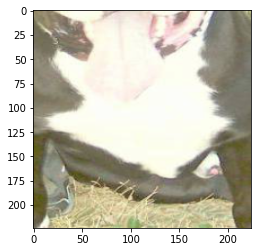

In [13]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

In [14]:
classes = ['cat', 'dog']

In [15]:
def show_batch(batch):
    iterat = next(batch)
    X_batch, y_batch = iterat
    for i in range(batch_size):
        plt.imshow(X_batch[i].permute(1, 2, 0) * std + mean);
        plt.title(classes[y_batch[i]])
        plt.show()

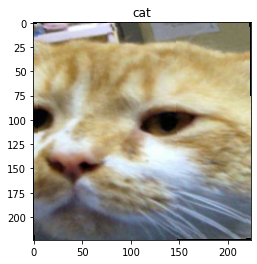

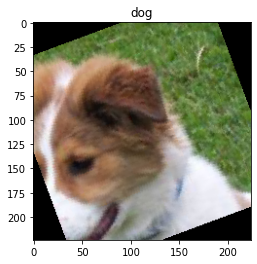

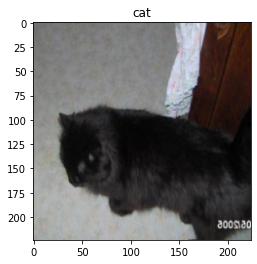

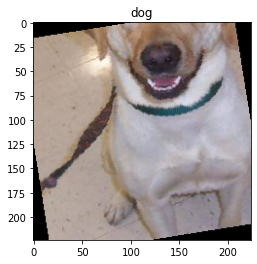

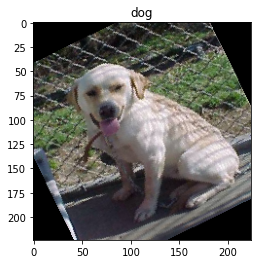

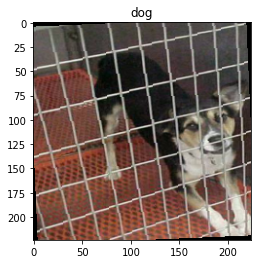

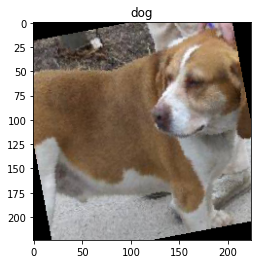

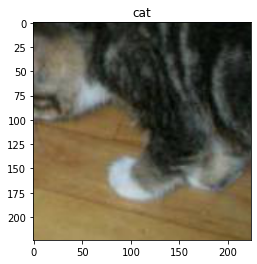

In [17]:
show_batch(iter(train_dataloader))

In [16]:
next(iter(train_dataloader))

[tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           ...,
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
          [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           ...,
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
           [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
          [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
           [-

In [17]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1))

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

In [18]:
model = models.resnet18(pretrained=True)

# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [19]:
train_model(model, loss, optimizer, scheduler, num_epochs=100);

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch 0/99:


100%|██████████| 7812/7812 [05:08<00:00, 25.30it/s]

train Loss: 0.3043 Acc: 0.8645



100%|██████████| 521/521 [00:20<00:00, 25.58it/s]

val Loss: 0.0777 Acc: 0.9702


Epoch 1/99:


100%|██████████| 7812/7812 [05:07<00:00, 25.38it/s]

train Loss: 0.2898 Acc: 0.8738



100%|██████████| 521/521 [00:20<00:00, 25.82it/s]

val Loss: 0.0717 Acc: 0.9722


Epoch 2/99:


100%|██████████| 7812/7812 [05:09<00:00, 25.27it/s]

train Loss: 0.2878 Acc: 0.8741



100%|██████████| 521/521 [00:20<00:00, 25.14it/s]

val Loss: 0.0783 Acc: 0.9686


Epoch 3/99:


  1%|          | 63/7812 [00:03<07:24, 17.43it/s] 


KeyboardInterrupt: 

In [20]:
os.makedirs(os.path.join('./test'))
with zipfile.ZipFile('../input/dogs-vs-cats/test1.zip') as zip_obj:
    zip_obj.extractall('./test')

In [21]:
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path
    
test_dataset = ImageFolderWithPaths('/kaggle/working/test/', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [22]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    test_img_paths.extend(paths)
    
test_predictions = np.concatenate(test_predictions)

100%|██████████| 1563/1563 [01:05<00:00, 23.94it/s]


In [26]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()

In [27]:
it = iter(test_dataloader)

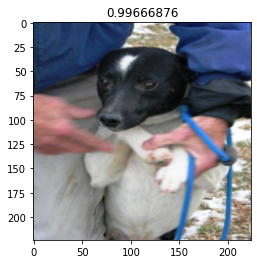

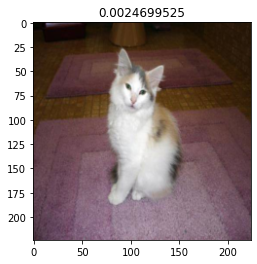

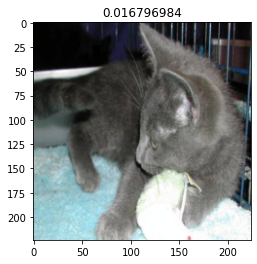

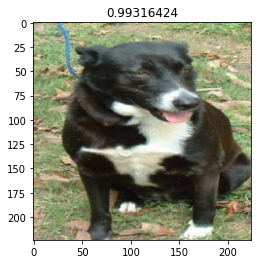

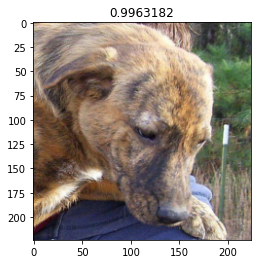

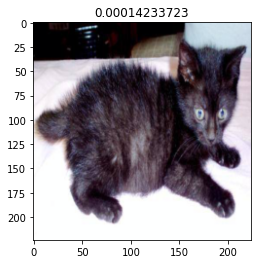

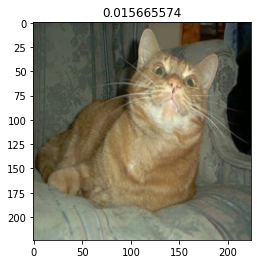

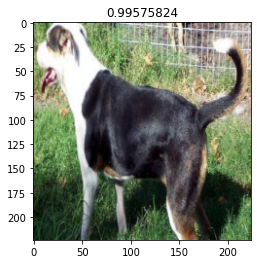

In [28]:
inputs, labels, paths = next(it)

for img, pred in zip(inputs, test_predictions):
    show_input(img, title=pred)

In [70]:
submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'label': test_predictions})

In [71]:
submission_df['label'] = submission_df['label'].map(lambda pred: 1 if pred > 0.5 else 0)
submission_df['id'] = submission_df['id'].str.replace('/kaggle/working/test/test1/', '')
submission_df['id'] = submission_df['id'].str.replace('.jpg', '')
submission_df = submission_df.astype({'id' : 'int32'})
submission_df.set_index('id', inplace=True)
submission_df.sort_index(inplace = True)
submission_df.head(n=100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,label
id,
1,1
2,1
3,1
4,1
5,0
...,...
96,0
97,1
98,1


In [72]:
submission_df.to_csv('submission.csv')


In [74]:
submission_df

,label
id,
1,1
2,1
3,1
4,1
5,0
...,...
12496,0
12497,0
12498,1


 # final_score == '0.98091'
